In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


In [4]:
chembl = pd.read_csv("ChEMBL/ChEMBL_P08684_activities.csv", sep=";")

/tmp/ipykernel_13324/51894694.py:1: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  chembl = pd.read_csv("ChEMBL/ChEMBL_P08684_activities.csv", sep=";")


In [5]:
chembl

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL1405,ESTRONE,4.0,270.37,0.0,3.82,ESTRONE,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O,IC50,NaN,...,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN
1,CHEMBL404811,DIGITONIN,NaN,1229.32,NaN,NaN,DIGITONIN,C[C@@H]1CC[C@@]2(OC1)O[C@H]1[C@@H](O)[C@H]3[C@...,Ki,NaN,...,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN
2,CHEMBL288857,NaN,NaN,474.55,1.0,5.37,18a,CCCCCO/C(O)=C1\C(C)=NC(C)=C(C(=O)OCCOCCC)C1c1c...,Rate of oxidation,'=',...,SINGLE PROTEIN,CHEMBL1123360,1,Scientific Literature,J Med Chem,1986.0,NaN,NaN,NaN,NaN
3,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1145779,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN
4,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1145779,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53854,CHEMBL4847873,NaN,NaN,421.38,0.0,3.70,11mR,CCC[C@H](c1nc2ccc(Br)cc2c(=O)n1CC)N1C[C@@H](C)...,Inhibition,'=',...,SINGLE PROTEIN,CHEMBL4823330,1,Scientific Literature,ACS Med Chem Lett,2021.0,NaN,Dose = 1.0 microM | TIME = 0.5 hr,INHIBITOR,NaN
53855,CHEMBL4868703,NaN,NaN,419.57,0.0,4.00,11r,CCCC(c1nc2cc(-c3ccncc3)ccc2c(=O)n1CC)N1C[C@@H]...,Inhibition,'=',...,SINGLE PROTEIN,CHEMBL4823330,1,Scientific Literature,ACS Med Chem Lett,2021.0,NaN,Dose = 1.0 microM | TIME = 0.5 hr,INHIBITOR,NaN
53856,CHEMBL254316,RALTEGRAVIR,4.0,444.42,0.0,0.91,53,Cc1nnc(C(=O)NC(C)(C)c2nc(C(=O)NCc3ccc(F)cc3)c(...,Activity,'=',...,SINGLE PROTEIN,CHEMBL5244274,1,Scientific Literature,J Med Chem,2021.0,NaN,NaN,ACTIVATOR,NaN
53857,CHEMBL5183579,NaN,NaN,557.65,2.0,5.05,37,N#Cc1ccc(CN2CCC(NC(=O)c3ccc(C(=O)N4CCC(C(F)c5c...,IC50,NaN,...,SINGLE PROTEIN,CHEMBL5108030,1,Scientific Literature,Bioorg Med Chem,2022.0,NaN,NaN,NaN,NaN


In [6]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [7]:
chembl["Data Validity Comment"].value_counts()

Data Validity Comment
Outside typical range            273
Potential missing data             7
Potential transcription error      5
Name: count, dtype: int64

In [27]:
chembl["Action Type"].value_counts()

Action Type
INHIBITOR        1152
SUBSTRATE         119
ACTIVATOR          73
DEGRADER            9
BINDING AGENT       7
ANTAGONIST          3
Name: count, dtype: int64

In [29]:
chembl["Standard Units"].value_counts()

Standard Units
nM               33691
%                 6351
uM                 720
/min               145
hr                  70
min-1               56
/s                  42
/uM/min             26
degrees C           24
pmol/min            24
mL.min-1.g-1        18
nmol/min            16
min                 15
10^-4/min           13
mM                  13
%/min               12
uL/min              11
L/min/umol           9
nm                   9
uL/min/pmol          8
10'-4/min            6
/min/nM              4
pmol/hr              4
%/min/pmol           4
ml/min/nmol          3
nmol/min/mg          3
ug/L                 3
ug.mL-1              3
/min/microM          3
ml/min/mg            3
10'3ml/min           3
uL/min/nmol          2
/nM.min              2
uL/min.mg            2
pmol/min/pmol        2
pmol/mg.min          2
uL/mg/min            2
ml/min/uL            2
ml/min/umol          1
ng/ml                1
ul.min.nmol-1        1
/hr                  1
mol/min            

In [30]:
chembl["Standard Type"].value_counts()

Standard Type
AC50                          17143
Potency                       13692
IC50                          12205
Inhibition                     4994
Activity                       1704
Ki                             1121
Drug metabolism                 507
INH                             496
TDI                             412
Ratio IC50                      263
FC                              237
Stability                       126
Kinact                          111
Ratio                            97
K                                79
Km                               71
T1/2                             70
Log 1/Km                         58
Compound recovery                54
CL                               54
EC50                             45
Kcat                             44
mechanism based inhibition       34
Ks                               31
Vmax                             28
Rate of oxidation                18
Emax                             16
Kd            

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

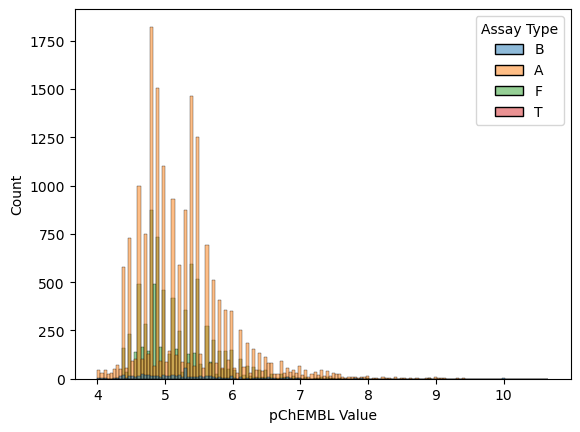

In [9]:
sns.histplot(data=chembl, x="pChEMBL Value", hue="Assay Type")

<Axes: xlabel='Action Type', ylabel='count'>

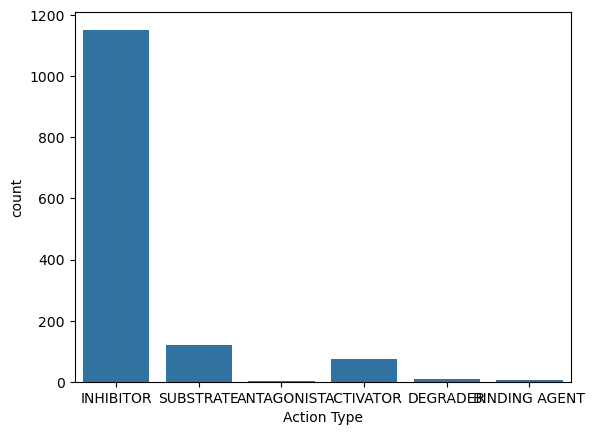

In [10]:
sns.countplot(data=chembl, x="Action Type")

In [12]:
chembl["Molecule ChEMBL ID"].nunique()

33986

In [22]:
chembl["Assay ChEMBL ID"].nunique()

4931

33986 unique molecules
4931 unique assays 


In [13]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [15]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [17]:

with BlockLogs():
    chembl["CANONICAL_SMILES"] = chembl["Smiles"].progress_apply(lambda x: standardize_smiles(x))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53859/53859 [07:24<00:00, 121.06it/s]


In [18]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [20]:
# compute inchikeys
with BlockLogs():
    chembl["INCHIKEY"] = chembl["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53859/53859 [00:15<00:00, 3455.47it/s]


In [21]:
chembl.INCHIKEY.nunique()

33406

In [231]:
chembl.dropna(subset="INCHIKEY", inplace=True)

# select higher quality data

See here for more detail 

https://greglandrum.github.io/rdkit-blog/posts/2023-06-12-overlapping-ic50-assays1.html

In [232]:
better_assay = chembl[
    (chembl['Standard Type'] == 'IC50') |
    (chembl['Standard Type'] == 'AC50') |
    (chembl['Standard Type'] == 'pIC50') |
    (chembl['Standard Type'] == 'XC50') |
    (chembl['Standard Type'] == 'EC50') | 
    (chembl['Standard Type'] == 'Ki') |
    (chembl['Standard Type'] == 'Potency')
]

In [233]:
better_assay

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY
0,CHEMBL1405,ESTRONE,4.0,270.37,0.0,3.82,ESTRONE,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O,IC50,NaN,...,15,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O,DNXHEGUUPJUMQT-CBZIJGRNSA-N
1,CHEMBL404811,DIGITONIN,NaN,1229.32,NaN,NaN,DIGITONIN,C[C@@H]1CC[C@@]2(OC1)O[C@H]1[C@@H](O)[C@H]3[C@...,Ki,NaN,...,15,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN,C[C@@H]1CC[C@@]2(OC1)O[C@H]1[C@@H](O)[C@H]3[C@...,UVYVLBIGDKGWPX-YCCXZQINSA-N
3,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,CC(C)CC(C=O)NC(=O)C(NS(=O)(=O)c1ccc(F)cc1)C(C)C,WSJWUIDLGZAXID-UHFFFAOYSA-N
4,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,CC(C)CC(C=O)NC(=O)C(NS(=O)(=O)c1ccc(F)cc1)C(C)C,WSJWUIDLGZAXID-UHFFFAOYSA-N
5,CHEMBL1109,SULFAPHENAZOLE,4.0,314.37,0.0,2.26,SID26747662,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,Potency,'=',...,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53851,CHEMBL5175220,NaN,NaN,573.75,2.0,5.40,26,CC(=O)N1CCc2c(nc(C)n2[C@@H]2C[C@H]3CC[C@@H](C2...,IC50,'>',...,1,Scientific Literature,J Med Chem,2022.0,NaN,NaN,NaN,NaN,CC(=O)N1CCc2c(nc(C)n2[C@@H]2C[C@H]3CC[C@@H](C2...,CHNHYOHQPDHUOP-QYOOZWMWSA-N
53852,CHEMBL5267910,NaN,NaN,483.59,0.0,4.56,42,O=C(Nc1ccc(-c2ccc(F)cn2)cc1)c1cc2sc(NCCN3CCOCC...,IC50,'=',...,1,Scientific Literature,Bioorg Med Chem,2020.0,NaN,NaN,INHIBITOR,NaN,O=C(Nc1ccc(-c2ccc(F)cn2)cc1)c1cc2sc(NCCN3CCOCC...,RKMXNTQXGVOORY-UHFFFAOYSA-N
53853,CHEMBL4846941,NaN,NaN,570.47,2.0,8.05,8,O=C(O)c1cc(F)c2nc(N3CCC4(C=C(c5c(-c6c(Cl)cccc6...,IC50,'=',...,1,Scientific Literature,ACS Med Chem Lett,2021.0,NaN,TIME = 0.25 hr,INHIBITOR,NaN,O=C(O)c1cc(F)c2nc(N3CCC4(C=C(c5c(-c6c(Cl)cccc6...,HSWCABTYQVCNCT-UHFFFAOYSA-N
53857,CHEMBL5183579,NaN,NaN,557.65,2.0,5.05,37,N#Cc1ccc(CN2CCC(NC(=O)c3ccc(C(=O)N4CCC(C(F)c5c...,IC50,NaN,...,1,Scientific Literature,Bioorg Med Chem,2022.0,NaN,NaN,NaN,NaN,N#Cc1ccc(CN2CCC(NC(=O)c3ccc(C(=O)N4CCC(C(F)c5c...,FJNHSBVZTQFKEF-UHFFFAOYSA-N


In [234]:
better_units = better_assay[better_assay['Standard Units'] == "nM"]
better_units

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY
3,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,CC(C)CC(C=O)NC(=O)C(NS(=O)(=O)c1ccc(F)cc1)C(C)C,WSJWUIDLGZAXID-UHFFFAOYSA-N
4,CHEMBL168471,NaN,NaN,372.46,0.0,1.86,8,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,IC50,'=',...,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,CC(C)CC(C=O)NC(=O)C(NS(=O)(=O)c1ccc(F)cc1)C(C)C,WSJWUIDLGZAXID-UHFFFAOYSA-N
5,CHEMBL1109,SULFAPHENAZOLE,4.0,314.37,0.0,2.26,SID26747662,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,Potency,'=',...,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N
6,CHEMBL8706,CLORGILINE,2.0,272.18,0.0,3.33,SID11111452,C#CCN(C)CCCOc1ccc(Cl)cc1Cl,Potency,'=',...,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,C#CCN(C)CCCOc1ccc(Cl)cc1Cl,BTFHLQRNAMSNLC-UHFFFAOYSA-N
7,CHEMBL1600586,NaN,NaN,417.46,0.0,0.36,SID26751076,COC(=O)C/C=C\[C@@H](C)[C@@H](/C=N\OC[C@@H](O)[...,Potency,'=',...,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,COC(=O)C/C=C\[C@@H](C)[C@@H](/C=N\OC[C@@H](O)[...,JOOFLNOPMODRHL-PCZNLFPRSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53850,CHEMBL5287462,NaN,NaN,458.62,0.0,4.62,12d,CN1CCC[C@H](N(c2cc(C#CC(C)(C)C)sc2C(=O)O)C(=O)...,IC50,'>',...,1,Scientific Literature,ACS Med Chem Lett,2017.0,NaN,TIME = 0.1667 hr,NaN,NaN,CC1CCC(C(=O)N(c2cc(C#CC(C)(C)C)sc2C(=O)O)C2CCC...,MGEVBIDQMYTWFL-UHFFFAOYSA-N
53851,CHEMBL5175220,NaN,NaN,573.75,2.0,5.40,26,CC(=O)N1CCc2c(nc(C)n2[C@@H]2C[C@H]3CC[C@@H](C2...,IC50,'>',...,1,Scientific Literature,J Med Chem,2022.0,NaN,NaN,NaN,NaN,CC(=O)N1CCc2c(nc(C)n2[C@@H]2C[C@H]3CC[C@@H](C2...,CHNHYOHQPDHUOP-QYOOZWMWSA-N
53852,CHEMBL5267910,NaN,NaN,483.59,0.0,4.56,42,O=C(Nc1ccc(-c2ccc(F)cn2)cc1)c1cc2sc(NCCN3CCOCC...,IC50,'=',...,1,Scientific Literature,Bioorg Med Chem,2020.0,NaN,NaN,INHIBITOR,NaN,O=C(Nc1ccc(-c2ccc(F)cn2)cc1)c1cc2sc(NCCN3CCOCC...,RKMXNTQXGVOORY-UHFFFAOYSA-N
53853,CHEMBL4846941,NaN,NaN,570.47,2.0,8.05,8,O=C(O)c1cc(F)c2nc(N3CCC4(C=C(c5c(-c6c(Cl)cccc6...,IC50,'=',...,1,Scientific Literature,ACS Med Chem Lett,2021.0,NaN,TIME = 0.25 hr,INHIBITOR,NaN,O=C(O)c1cc(F)c2nc(N3CCC4(C=C(c5c(-c6c(Cl)cccc6...,HSWCABTYQVCNCT-UHFFFAOYSA-N


In [235]:
num_compounds_per_assay = better_units.groupby("Assay ChEMBL ID")["Molecule ChEMBL ID"].nunique()

In [236]:
num_compounds_per_assay

Assay ChEMBL ID
CHEMBL1000505     4
CHEMBL1000506     4
CHEMBL1000805    19
CHEMBL1001513    20
CHEMBL1002238     5
                 ..
CHEMBL996822      6
CHEMBL997024      1
CHEMBL998722      1
CHEMBL999263      3
CHEMBL999389      8
Name: Molecule ChEMBL ID, Length: 2500, dtype: int64

In [237]:
num_compounds_per_assay_df = pd.DataFrame(num_compounds_per_assay)
num_compounds_per_assay_df.rename(columns={"Molecule ChEMBL ID": "molecule_count"}, inplace=True)
num_compounds_per_assay_df

,molecule_count
Assay ChEMBL ID,
CHEMBL1000505,4
CHEMBL1000506,4
CHEMBL1000805,19
CHEMBL1001513,20
CHEMBL1002238,5
...,...
CHEMBL996822,6
CHEMBL997024,1
CHEMBL998722,1


In [238]:
combined = better_units.join(num_compounds_per_assay_df, on="Assay ChEMBL ID")
combined["molecule_count"].unique()

array([   1, 6472,   15,    2,   16,   19,   17,    6,   12,    3,   14,
          7,   25,   42,    8,   28,   22,    4,  187,   18,    5,   10,
         29,   21,   32,   46,   20,   13,   51,   30,   33,   11,   24,
         38,   26,   35,    9,   43,   85, 8633,   34,   39,   23,   27,
         48,   64,  165,   47,   37,   65])

In [239]:
more_than_20_compounds = combined[combined["molecule_count"] > 20]  

In [240]:
more_than_20_compounds

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY,molecule_count
5,CHEMBL1109,SULFAPHENAZOLE,4.0,314.37,0.0,2.26,SID26747662,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,Potency,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,6472
6,CHEMBL8706,CLORGILINE,2.0,272.18,0.0,3.33,SID11111452,C#CCN(C)CCCOc1ccc(Cl)cc1Cl,Potency,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,C#CCN(C)CCCOc1ccc(Cl)cc1Cl,BTFHLQRNAMSNLC-UHFFFAOYSA-N,6472
7,CHEMBL1600586,NaN,NaN,417.46,0.0,0.36,SID26751076,COC(=O)C/C=C\[C@@H](C)[C@@H](/C=N\OC[C@@H](O)[...,Potency,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,COC(=O)C/C=C\[C@@H](C)[C@@H](/C=N\OC[C@@H](O)[...,JOOFLNOPMODRHL-PCZNLFPRSA-N,6472
8,CHEMBL1417358,NaN,NaN,486.57,0.0,4.19,SID17385348,COC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H]1C[C@@H]1[C@...,Potency,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,COC(=O)C(Cc1ccccc1)NC(=O)C1C[C@@H]1[C@H](NC(=O...,OABRKEQNGZWBBC-LKIFIEJRSA-N,6472
9,CHEMBL1357941,NaN,NaN,522.56,2.0,5.16,SID11114057,CCOC(=O)C1=C(C)NC(c2ccccc2)=C(C(=O)OCc2ccc([N+...,Potency,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,CCOC(=O)C1=C(C)N=C(c2ccccc2)C(C(=O)OCc2ccc([N+...,LRTNJIWAQJAWGO-HSLSYKTRSA-N,6472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53791,CHEMBL5075886,NaN,NaN,735.80,3.0,6.28,3c,COc1cc2c(cc1OC)CN(CCc1ccc(-n3nnc(-c4cc(OCc5ccn...,IC50,'>',...,Scientific Literature,J Med Chem,2022.0,NaN,TIME = 0.5 hr,NaN,NaN,COc1cc2c(cc1OC)CN(CCc1ccc(-n3nnc(-c4cc(OCc5ccn...,HNJVTJANLLZWKY-UHFFFAOYSA-N,23
53802,CHEMBL5179243,NaN,NaN,410.47,0.0,4.33,20,COC(=O)Nc1cc(-c2ccc(OC[C@@H](N)CC(C)C)c(-c3ccn...,IC50,'=',...,Scientific Literature,J Med Chem,2022.0,NaN,TIME = 0.1667 hr,INHIBITOR,NaN,COC(=O)Nc1cc(-c2ccc(OC[C@@H](N)CC(C)C)c(-c3ccn...,MDBWZAGCBGPXST-KRWDZBQOSA-N,48
53803,CHEMBL5194195,NaN,NaN,349.43,0.0,4.53,57,Cc1cc(-c2ccnc(C(F)F)c2)ncc1OC[C@@](C)(N)CC(C)C,IC50,'>',...,Scientific Literature,J Med Chem,2022.0,NaN,TIME = 0.1667 hr,NaN,NaN,Cc1cc(-c2ccnc(C(F)F)c2)ncc1OC[C@@](C)(N)CC(C)C,VYPORTDNBOGDIG-IBGZPJMESA-N,48
53816,CHEMBL5183016,NaN,NaN,409.45,0.0,4.87,21,CC(=O)Nc1cc(-c2ccc(OC[C@@](C)(N)CC(C)C)c(C(F)(...,IC50,'=',...,Scientific Literature,J Med Chem,2022.0,NaN,TIME = 0.1667 hr,INHIBITOR,NaN,CC(=O)Nc1cc(-c2ccc(OC[C@@](C)(N)CC(C)C)c(C(F)(...,JRJSMTAUWDJJIH-FQEVSTJZSA-N,48


In [241]:
more_than_20_compounds.INCHIKEY = more_than_20_compounds.INCHIKEY.astype(str)

/tmp/ipykernel_13324/4160246862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_20_compounds.INCHIKEY = more_than_20_compounds.INCHIKEY.astype(str)


<Axes: xlabel='pChEMBL Value', ylabel='Count'>

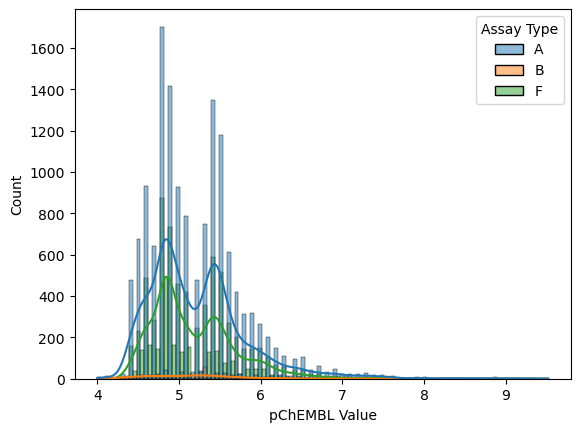

In [242]:
sns.histplot(data=more_than_20_compounds, x="pChEMBL Value", hue="Assay Type", kde=True)

<Axes: xlabel='Molecular Weight', ylabel='Count'>

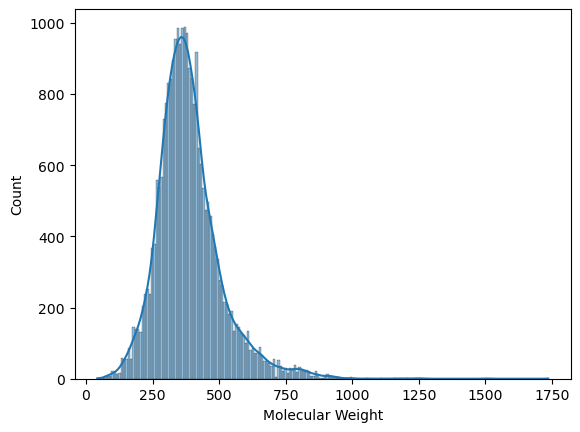

In [243]:
sns.histplot(data=more_than_20_compounds, x="Molecular Weight",  kde=True)

In [244]:
assays = more_than_20_compounds["Assay ChEMBL ID"].nunique()

In [245]:
assays

85

In [246]:
more_than_20_compounds["Molecule ChEMBL ID"].nunique()

13533

In [254]:
num_assays_per_compound_df = more_than_20_compounds.groupby(["INCHIKEY"])["Assay ChEMBL ID"].size().reset_index(name="assay_count")
num_assays_per_compound_df = num_assays_per_compound_df.set_index("INCHIKEY")

In [248]:
num_assays_per_compound_df.INCHIKEY = num_assays_per_compound_df.INCHIKEY.astype(str)

<Axes: xlabel='assay_count', ylabel='count'>

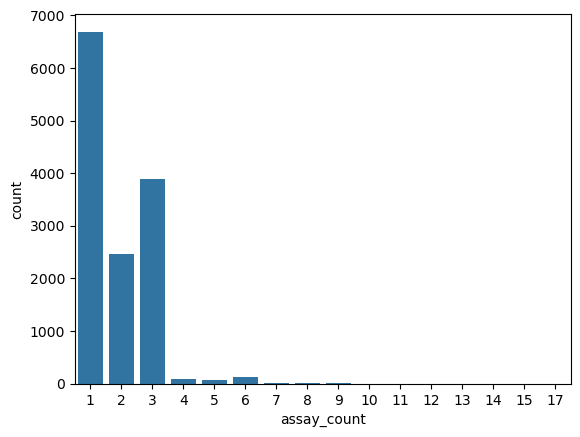

In [256]:
sns.countplot(data=num_assays_per_compound_df, x="assay_count")

In [257]:
combined = more_than_20_compounds.join(num_assays_per_compound_df, on="INCHIKEY")


In [265]:
combined.sort_values("assay_count", ascending=False, inplace=True)
combined["assay_count"] = combined["assay_count"].astype(int)

In [281]:


more_than_three_assay = combined[combined["assay_count"] > 3]
more_than_three_assay

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY,molecule_count,assay_count
28288,CHEMBL611494,SALAGEN,NaN,208.26,0.0,1.16,SID11113352,CC[C@H]1C(=O)OC[C@H]1Cc1cncn1C,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,8633,17
28535,CHEMBL611494,SALAGEN,NaN,208.26,0.0,1.16,SID11113352,CC[C@H]1C(=O)OC[C@H]1Cc1cncn1C,Potency,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,6472,17
45632,CHEMBL611494,SALAGEN,NaN,208.26,0.0,1.16,SID11110643,CC[C@H]1C(=O)OC[C@H]1Cc1cncn1C,Potency,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,6472,17
36792,CHEMBL1474730,NaN,NaN,271.27,0.0,1.16,SID26748206,CCC1C(=O)OC[C@H]1Cc1cncn1C.O=[N+]([O-])O,Potency,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,6472,17
41864,CHEMBL611494,SALAGEN,NaN,208.26,0.0,1.16,SID11111650,CC[C@H]1C(=O)OC[C@H]1Cc1cncn1C,Potency,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,6472,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16163,CHEMBL1570261,NaN,NaN,413.43,0.0,2.88,SID26754201,COc1ccc2c(c1OC)C(=O)O[C@H]2C1c2c(cc3c(c2OC)OCO...,Potency,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc2c(c1OC)C(=O)O[C@H]2C1c2c(cc3c(c2OC)OCO...,AKNNEGZIBPJZJG-QRWMCTBCSA-N,6472,4
16293,CHEMBL584,NELFINAVIR,4.0,567.80,1.0,4.75,Nelfinavir,Cc1c(O)cccc1C(=O)N[C@@H](CSc1ccccc1)[C@H](O)CN...,IC50,'=',...,J Med Chem,2003.0,NaN,NaN,NaN,NaN,Cc1c(O)cccc1C(=O)N[C@@H](CSc1ccccc1)[C@H](O)CN...,QAGYKUNXZHXKMR-RHMILFQJSA-N,28,4
45650,CHEMBL1445792,NaN,NaN,372.37,0.0,3.09,SID26752707,COc1ccc(OC2C=CC(C#Cc3ccc(F)cc3F)OC2CO)cc1,Potency,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(OC2C=CC(C#Cc3ccc(F)cc3F)OC2CO)cc1,QWSXXVLWKGHNHH-UHFFFAOYSA-N,6472,4
52159,CHEMBL179669,NaN,NaN,175.26,0.0,3.12,"Table 1, R5C2; Table 4-8, cpd 4; Table 9, R5C1...",Cc1ccsc1-c1cccnc1,IC50,'=',...,NaN,2013.0,NaN,NaN,NaN,NaN,Cc1ccsc1-c1cccnc1,JIOQSJVEVFADJG-UHFFFAOYSA-N,35,4


In [284]:
more_than_three_assay.INCHIKEY.nunique()

361

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

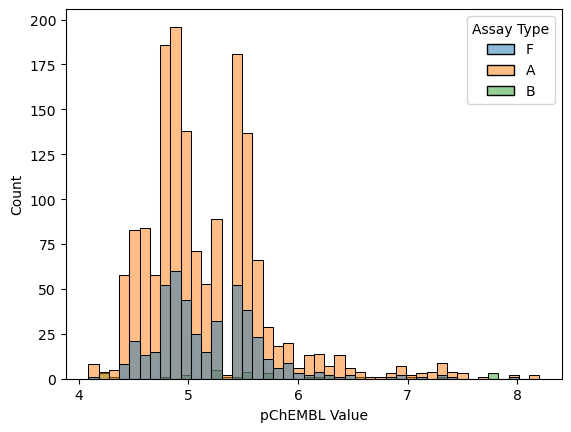

In [283]:
sns.histplot(data=more_than_three_assay, x="pChEMBL Value", hue="Assay Type")

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

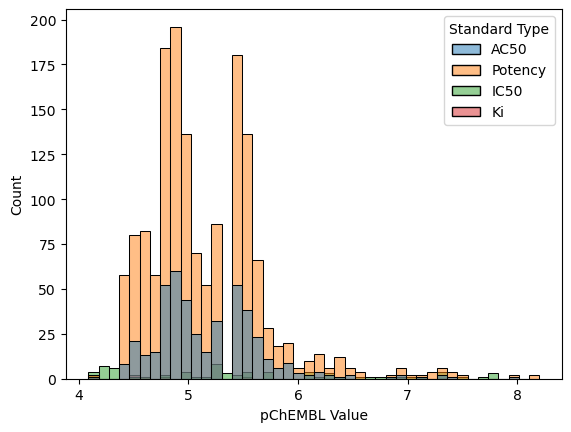

In [282]:
sns.histplot(data=more_than_three_assay, x="pChEMBL Value", hue="Standard Type")

In [289]:
compound_grouped_mean = more_than_three_assay.groupby("INCHIKEY")["pChEMBL Value"].mean()

In [290]:
compound_grouped_mean

INCHIKEY
ACIMRXKJKQGBGL-UHFFFAOYSA-N    4.800000
AFAIELJLZYUNPW-UHFFFAOYSA-N    5.200000
AGJBLWCLQCKRJP-UHFFFAOYSA-N    5.220000
AIONOLUJZLIMTK-AWEZNQCLSA-N    4.920000
AJPSBXJNFJCCBI-PZQVLSSCSA-N    4.550000
                                 ...   
ZOWYFYXTIWQBEP-UHFFFAOYSA-N    5.140000
ZQSIJRDFPHDXIC-UHFFFAOYSA-N    4.720000
ZSCDBOWYZJWBIY-INIZCTEOSA-N    5.050000
ZYDDNRNLNLHSNQ-UHFFFAOYSA-N    5.466667
ZZJYIKPMDIWRSN-OTNCWRBYSA-N    4.750000
Name: pChEMBL Value, Length: 361, dtype: float64

In [292]:
compound_grouped_std = more_than_three_assay.groupby("INCHIKEY")["pChEMBL Value"].std()
compound_grouped_std

INCHIKEY
ACIMRXKJKQGBGL-UHFFFAOYSA-N    0.000000
AFAIELJLZYUNPW-UHFFFAOYSA-N    0.346410
AGJBLWCLQCKRJP-UHFFFAOYSA-N    0.383406
AIONOLUJZLIMTK-AWEZNQCLSA-N    0.109545
AJPSBXJNFJCCBI-PZQVLSSCSA-N    0.054772
                                 ...   
ZOWYFYXTIWQBEP-UHFFFAOYSA-N    0.219089
ZQSIJRDFPHDXIC-UHFFFAOYSA-N    0.109545
ZSCDBOWYZJWBIY-INIZCTEOSA-N    0.054772
ZYDDNRNLNLHSNQ-UHFFFAOYSA-N    0.051640
ZZJYIKPMDIWRSN-OTNCWRBYSA-N    0.054772
Name: pChEMBL Value, Length: 361, dtype: float64